# Chapter 3: Supervised Learning

$$ % Latex macros
\newcommand{\mat}[1]{\begin{pmatrix} #1 \end{pmatrix}}
\newcommand{\p}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\b}[1]{\boldsymbol{#1}}
\newcommand{\w}{\boldsymbol{w}}
\newcommand{\x}{\boldsymbol{x}}
\newcommand{\y}{\boldsymbol{y}}
$$

## Contents
* 3.1 Function Approximation (Bishop 2006, Chater 3)
    * Linear regression
    * Least squares – Maximum likelihood
    * Online learning – Stochastic gradient descent


* 3.2 Pattern Recognition (Bishop 2006, Chapter 4)
    * Perceptron
    * Logistic regression  
    * Support vector machine
    

* 3.3 Classical Conditining


* 3.4 Cerebellum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

The aim of *supervised learning* is to construct an input-output mapping
$$ \y = f(\x) $$
from pairs of samples $(\x_1,\y_1),...,(\x_N,\y_N)$.

When $\y$ is continuous, it is called *function approximation* or *regression*.

When $\y$ is discrete, it is called *pattern recognition* or *classification*.

Here we focus on the case where the output is one dimension and computed from weighted sum of the inputs $x_1,...,x_D$
$$
    y = f(\x;\w) = g( w_0 + w_1 x_1 + ... + w_D x_D).
$$

This is considered as an artificial neuron unit with input synaptic weights $w_1,...,w_D$, bias $w_0$ (or threshold $-w_0$), and the output function $g(\ )$.

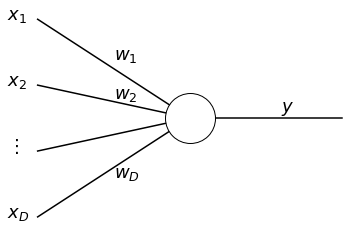

In [2]:
# Illustration of a neuron unit
D = 5
x = [r"$x_1$", r"$x_2$", r"$\vdots$ ",r"$x_D$"]
w = [r"$w_1$", r"$w_2$", "",r"$w_D$"]
for i in range(4):
    plt.text(-0.2, 1.5-i, x[i], fontsize=18)  # inputs
    plt.plot([0,1], [1.5-i,0], "k")  # inputs
    plt.text(0.5, (1.5-i)*0.6, w[i], fontsize=18)  # weights
plt.plot([1,2], [0,0], "k")   # output
plt.plot(1, 0, "ko", markersize=50, markerfacecolor="w")
plt.text(1.6, 0.1, r"$y$", fontsize=18)  # output
plt.axis("off");

## 3.1 Function Approximation

A typical case of function approximation in the brain is learning motor-sensory mapping; how does your arm respond to the activation of the muscles. In this case $\x$ is the acitivation pattern of the arm muscles and $\y$ is the changes in the arm joint angles, for example. Such an *internal model* of the body dynamics is very much helpful in motor control. In this case, the supervisor is your musculoskeletal system and sensory neurons.

## Linear Regression

In the simplest case, the output function is identity $g(u)=u$. This is the case of *linear regression*.

For $D$-dimensional input 
$$\x = (x_1,...,x_D)^T,$$
we take a weight vector
$$\w = (w_0,w_1,...,w_D)^T$$
and give a scalar output
$$
y = f(\x;\w) = w_0 + w_1 x_1 + ... + w_D x_D.
$$
By considering a constant input $x_0=1$ and redefining $\x$ as 
$$\x = (1,x_1,...,x_D)^T,$$
we have a simple vector notation
$$
y = f(\x;\w) = \w^T \x = \x^T \w.
$$

We represent a set of input data as a matrix
$$X = \pmatrix{\x_1^T \\ \vdots \\ \x_N^T}
    = \pmatrix{1 & x_{11} & \cdots & x_{1D}\\
    \vdots &\vdots & & \vdots\\
    1 & x_{N1} & \cdots & x_{ND}} 
$$
and the set of outputs is given in a vector form as
$$
\y = \pmatrix{y_1\\ \vdots \\y_N} = X \w.
$$

When a set of target outputs
$$ \y^* = \pmatrix{y^*_1\\ \vdots \\y^*_N}$$
is given, how can we find the appropriate weight vector $\w$ so that $\y$ becomes close to $\y^*$?

### Least square solution

A basic solution is to minimize the squared error between the target output and the model output
$$ E(\w) = \frac{1}{2}\sum_{n=1}^N (\w^T \x_n - y^*_n)^2 
 = \frac{1}{2} ||X\w - \y^*||^2. $$

To minimize this, we differentiate this error function with each weight parameter and set it equal to zero:
$$
    \p{E(\w)}{w_i} = \sum_{n=1}^N (\w^T \x_n - y^*_n)x_{ni} = 0.
$$
These are represented in a vector form as
$$
    \p{E(\w)}{\w} = X^T(X\w - \y^*) = (X^T X)\w - X^T\y^* = \b{0}.
$$
Thus the solution to this minimization problem is given by
$$
    \b{\hat{w}} = (X^T X)^{-1} X^T \y^*.
$$

### Maximum likelihood estimate

A statstician would assume that the target output is generated by a linear model with additional noise
$$
    y^*_n = \w^T\x_n + \epsilon_n
$$
where $\epsilon_n$ is assumed to follow a Gaussian distribution $\mathcal{N}(0,\sigma^2)$.
This is also re-written as
$$
    y^*_n \sim \mathcal{N}(\w^T\x_n,\sigma^2)
$$

> The Gaussian distribution is defined as:
$$
    p(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In this setup, the standard way of selecting the parameter is to find the one with the *maximum likelihood*, i.e. the probability of producing the data.

The likelihood of weights $\w$ for the set of observed data is the product of the likelihood for each data:
$$
    L(\w) = p(\y^*|X,\w,\sigma^2)
    = \prod_{n=1}^N (2\pi\sigma^2)^{-\frac{1}{2}}
    e^{-\frac{(y^*_n-\w^T\x_n)^2}{2\sigma^2}}.
$$
In maximizing the likelihood, it is mathematically and computationally more convenient to take its logarithm
$$
    l(\w) = \log p(\y^*|X,\w,\sigma^2)
    = \sum_{n=1}^N -\frac{1}{2}\log(2\pi\sigma^2)
    - \frac{(y^*_n-\w^T\x_n)^2}{2\sigma^2}
$$$$
    = - \frac{N}{2}\log(2\pi) - N\log\sigma  - \frac{1}{\sigma^2} E(\w).
$$

In the above, only the last term depends on the weights $\w$.
Thus the maximizing the likelihood is equivalent to minimizing the sum of squared errors $E(\w)$.

This link between minimal error and maximum likelihood is helpful when we consider regularization of parameters and Bayesian perspective in Chapter 6.

### Example: Arm dynamics

Let us simulate simple second-order dynamics of an arm hanging down and take the data.
Then we will make a linear regression model to predict the angular accleration from the angle and angular velocity.

In [3]:
from scipy.integrate import odeint

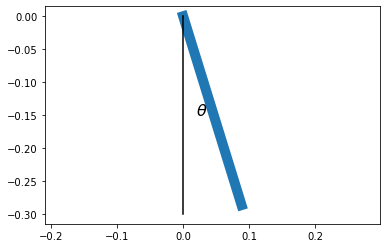

In [4]:
# Illustration of an arm hanging down
l = 0.3  # arm length: m
th = 0.3 # angle: rad
plt.plot([0,l*np.sin(th)], [0,-l*np.cos(th)], lw=10)
plt.plot([0,0], [0,-l], "k-")  # downward line
tex = plt.text(0.02, -0.5*l, r"$\theta$", fontsize=16)
plt.axis('equal');

In [5]:
# Dynamics of the arm
m = 5     # arm mass: kg
mu = 0.1  # damping: Nm/(rad/s)
g = 9.8   # gravity: N/s^2
I = (m*l**2)/3 # inertia for a rod around an end: kg m^2
def arm(x, t):
    """arm dynamics for odeint: x=[th,om]"""
    th, om = np.array(x)  # for readability
    # angular acceleration
    aa = (-m*g*l/2*np.sin(th) - mu*om)/I
    return np.array([om, aa])

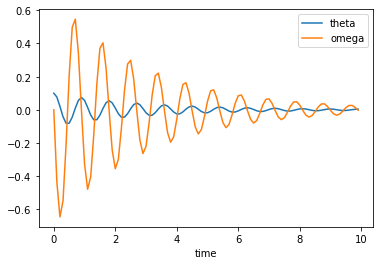

In [6]:
# Simulate for 10 sec.
dt = 0.1  # time step
t = np.arange(0, 10, dt)  # time points
X = odeint(arm, [0.1, 0], t)
plt.plot(t, X)
plt.xlabel("time")
plt.legend(("theta","omega"));

In [7]:
# Acceleration by differentiation
Y = (X[1:,1] - X[:-1,1])/dt  # temporal difference
X = X[:-1,:]    # omit the last point
N, D = X.shape  # data count and dimension
# add observation noise
sig = 1.0   # noise size
Y = Y + sig*np.random.randn(N)

In [8]:
# You may want to use notebook mode for rotating
%matplotlib notebook

<IPython.core.display.Javascript object>


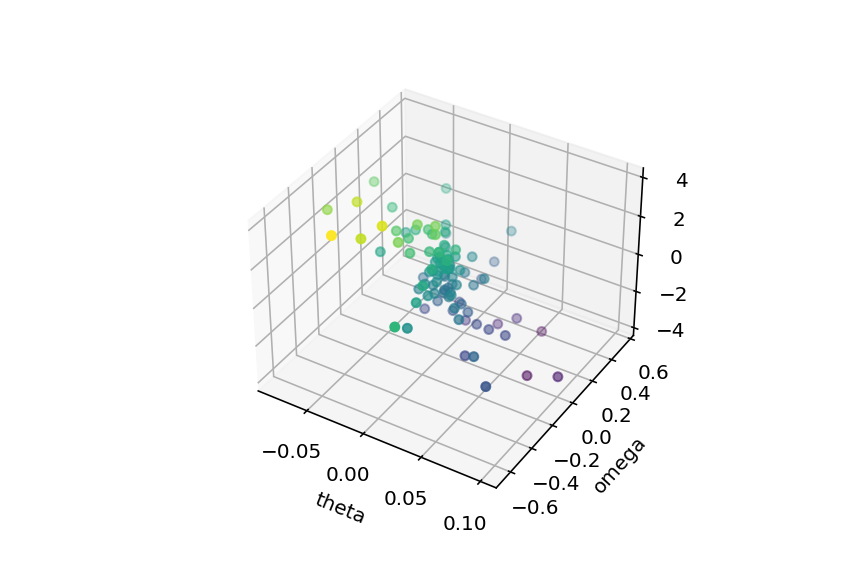

In [9]:
ax = plt.figure().add_subplot(111, projection='3d')
# Scatter plot in 3D
ax.scatter(X[:,0], X[:,1], Y, c=Y);
plt.xlabel("theta"); plt.ylabel("omega");

In [10]:
# Prepare data matrix
X1 = np.c_[np.ones(N), X] #  add a column of 1's
# Compute the weights: W = (X^T X)^(-1) X^T Y
w = np.linalg.inv(X1.T@X1) @ X1.T@Y
#w = np.linalg.solve(X1.T@X1, X1.T@Y)
print("w =", w)
print([0, -m*g*l/2/I, -mu/I])  # analytic values

w = [ -0.06626054 -40.40755694  -3.19475889]
[0, -49.0, -0.6666666666666667]


In [11]:
# Squared error
mse = np.sum((X1@w - Y)**2)/N  # mean squared error
print("mse =", mse)

mse = 0.84855244329687


<IPython.core.display.Javascript object>


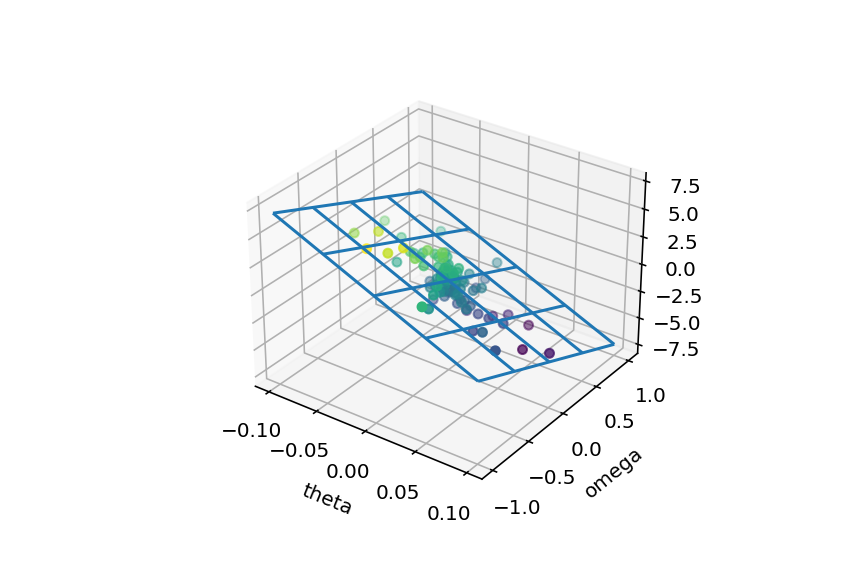

In [12]:
# Show regression surface
ax = plt.figure().add_subplot(111, projection='3d')
#  make a grid
X2, Y2 = np.meshgrid(np.linspace(-0.1,0.1,5),np.linspace(-1,1,5))
# show wireframe
Z2 = w[0] + w[1]*X2 + w[2]*Y2
ax.plot_wireframe(X2, Y2, Z2);
# show the data
ax.scatter(X[:,0], X[:,1], Y, c=Y);
plt.xlabel("theta"); plt.ylabel("omega");

## Online Learning

In the above, we assumed that all the data are available at once. However, data come in sequence and we would rather learn from the data as they come in.

The basic way of online learning is to minimize the output error for each input 
$$
    E_n(\w) = \frac{1}{2}(y^*_n - \w^T \x_n)^2
    $$
and move $\w$ down to its gradient
$$
    \Delta \w = - \alpha \p{E_n(\w)}{\w} = \alpha(y^*_n - \w^T \x_n)\x_n 
$$
where $\alpha>0$ is a learning rate paramter.

This is called *stochastic gradient descent (SGD)*, by assuming that $x_n$ are stochastic samples from the input data space.

Online learning has several advantages over *batch* algorithms like linear regrassion that processes all the data at once.
Online learning does not require matrix inversion, which is computationally expensive when dealing with high dimensional data (large $D$).
For a very large dataset (large $N$), simply storing a huge $N\times D$ data matrix $X$ in the memory can be costly. 

## Basis Functions

For approximating a nonlinear function of $\x$, a standard way is to prepare a set of nonlinear functions 
$$
    \b{\phi}(\x) = (\phi_1(\x),...,\phi_M(\x))^T,
$$
called basis functions, and represent the target function by
$$
    f(\x;\w) = \sum_{j=1}^M w_j \phi_j(\x) = \w^T\b{\phi}(\x).
$$

Classically, polynomials $(1, x, x^2, x^3,...)$ or sinusoids $(1, \cos x, \cos 2x,..., \sin x, \sin 2x,...)$ were often used as basis functions, motivated by polynomial expansion or Fourier expansion.

However, these functions can grow so lage or become so steep when we include higher order terms, which can make learned function chagning wildly.

### Radial Basis Functions

In sensory nervous systems, neurons tend to respond to signals in a limited range, called *receptive field*. For example, each visual neuron responds to light stimuli on a small area in the retina. Each auditory neurons repond to a limited range of frequency.

Partly inspired by such local receptive field properties, a popular class of basis functions is called *radial basis function (RBF)*. 
An RBF is give by a decreasing function of the distance from a center point:
$$
    \phi_j(\x) = g(||\x-\x_j||)
$$

A typical example is Gaussian basis functions.

In [ ]:
%matplotlib inline
# Gaussian basis functions in 1D
def phi(x, c, s=1):
    """Gaussian centered at x=c with scale s"""
    return np.exp(-((x - c)/s)**2)
M = 10  # x range
x = np.linspace(0, M, 100)
for c in range(M):
    plt.plot(x, phi(x, c, 1))
plt.xlabel("x"); plt.ylabel("$\phi(x)$");

Here you can generate random samples of functions using RBF.

In [ ]:
w = np.random.randn(M)  # random weights
y = x*0  # output to cover the same range as input
for c in range(M):
    y = y + w[c]*phi(x, c, s=1)  # try chaning the scale
plt.plot(x, y);

Here are RBFs in 2D input space on a grid.

In [ ]:
# 2D Gaussian basis functions
ax = plt.figure().add_subplot(111, projection='3d')
# prepare a surface grid
x = np.linspace(0, 10, 31)
X, Y = np.meshgrid(x, x)
# centers on another grid
for cx in range(2, 10, 3):
    for cy in range(2, 10, 3):
        Z = phi(X, cx, 1)*phi(Y, cy, 3)
        ax.plot_surface(X, Y, Z)
plt.xlabel("x1"); plt.ylabel("x2"); plt.title("$\phi(x)$");

#### Example: non-linear pendulum

## 3.2 Pattern Recognition

Here we consider a problem of classifying input vectors $\x$ into $K$ discrete classes $C_k$.

There are three major approaches in pattern classification.

* Learn a discriminant function: $\x \rightarrow C_k$

* Learn a conditional probability: $p(C_k|\x)$

* Learn a generative model $p(\x|C_k)$ and then use Bayes' theorem:
$$ p(C_k|\x) = \frac{p(\x|C_k)p(C_k)}{p(\x)} $$

Supervised pattern recognition has been highly successful in applications of image and speech recognition. 
However, it is a question whether suprevised learning is relevant for our vision and speech, becuase we do not usually receive labeles for objects or words when we learn to see or hear as infants.
*Unsupervised learning*, covered in Chapter 5, might be a more plausible way of human sensory learning.

## The Perceptron

The first pattern classification learning machine was called *Perceptron* (Rosenblatt 1962). 

> ![Perceptron](figures/Perceptron.jpg)
> The structure of a three-layer perceptron (from Rosenblatt, 1962).

The original Perceptron consisted of three layers of binary units: S(sensory)-units, A(associative)-units connected randomly with S-units, and R(response)-units.

Here we formulate the Perceptron in a generalized form. 
The input vector $\x$ is converted by a set of basis functions $\phi_i(\x)$ into a feature vector
$$
    \b{\phi}(\x)=(\phi_1(\x),...,\phi_M(\x))^T.
$$
In the simplest case, the feature vector is the same as the input vector $\b{\phi}(\x)=\x$, or just augumented by $1$ to represent bias as $\b{\phi}(\x)=\pmatrix{1 \\ \x}$.
This is called *linear Perceptron*.

The output is given by
$$
    y = f( \sum_{i=1}^M w_{i} \phi_i(\x)) = f( \w^T \b{\phi}(\x))
$$
where $\w=(w_1,...,w_M)^T$ is the output connection weights.

The output function takes +1 or -1:
$$
    f(u) = \begin{cases} 1 & \mbox{if } u \ge 0 \\ -1 & \mbox{if } u<0. \end{cases}
$$
For each input $\x_n$, the target output $y^*_n \in \{+1,-1\}$ is given.

### Perceptron Learning Rule

Learning of Perceptron is based on the error function
$$
    E(\w) = \sum_{y_n \ne y^*_n} -y^*_n\w^T\b{\phi}(\x_n)
$$
which takes a positive value for each missclassified output $y_n \ne y^*_n$.

The perceptron learning rule is the stochastic gradient
$$
    \Delta \w = -\alpha\p{E(\w)}{\w}
$$$$
    = \alpha y^*_n\b{\phi}(\x_n) \ \mbox{ if } y_n\ne y^*_n
$$$$
    = \frac{\alpha}{2}(y^*_n-y_n)\b{\phi}(\x_n)
$$
which is a product of the output error and the input to each weight.

When two classes are *linearly separable*, the *Preceptron converence theorem* assures that learning converges to find a proper hyperplane to separate two classes.

### Example: Perceptron in 2D feature space 

In [ ]:
class Perceptron:
    """Linear perceptron: phi(x)=[1,x]"""
    
    def __init__(self, D=2):
        """Create a new perceptron"""
        # self.w = np.random.randn(D+1)  # output weight
        self.w = np.zeros(D+1)  
        self.vis = False

    def output(self, x):
        """predict an output from input x"""
        u = self.w@np.r_[1,x]
        y = 1 if u>0 else -1
        if self.vis:
            plt.plot(x[0], x[1], "yo" if y>0 else "bo")
        return y

    def learn(self, x, yt, alpha=0.1):
        """learn from (x, yt) pair"""
        y = self.output(x)
        error = y - yt
        if error != 0:
            self.w += alpha*yt*np.r_[1,x]
        if self.vis:
            plt.plot(x[0], x[1], "y*" if yt>0 else "b*")
            self.plot_boundary()
        return error
    
    def plot_boundary(self, u=0, col="k", l=5):
        """plot decision boundary with shift u, length l"""
        # weight vector
        plt.plot([0,self.w[1]], [0,self.w[2]], "r", lw=2)
        plt.plot(self.w[1], self.w[2], "r*")  # arrowhead
        # decision boundary
        s = self.w[1]**2 + self.w[2]**2  # weight size
        x = self.w[1]*(u-self.w[0])/s+self.w[2]*np.array([l,-l])/np.sqrt(s)
        y = self.w[2]*(u-self.w[0])/s+self.w[1]*np.array([-l,l])/np.sqrt(s)
        plt.plot(x, y, col, lw=0.5)
        plt.xlabel("x1"); plt.ylabel("x2"); plt.axis("equal"); 


In [ ]:
# Test by 2D gaussian data
N = 10  # sample size
D = 2
Xp = np.random.randn(N,D) + np.array([3,2])  # positive data
Xn = np.random.randn(N,D)   # negative data
# concatenate positive/negative data
X = np.r_[Xp,Xn]
Yt = np.r_[np.ones(N),-np.ones(N)]  # target
N = 2*N
# plot the data
plt.scatter(X[:,0], X[:,1], c=Yt, marker="o")
plt.xlabel("x1"); plt.ylabel("x2"); plt.axis("equal");

In [ ]:
# Create a Perceptron
perc = Perceptron(D=2)  # perceptron with 2D input
perc.vis = True  # turn on visualization

In [ ]:
# Learning: run this cell several times
err = 0
# shuffle data order
for i in np.random.permutation(N):
    err += perc.learn(X[i], Yt[i])**2
print("mse =", err/N, "; w = ", perc.w)

## Support Vector Machine

With Perceptron learning rule, the line separating two classess can end up in any configuration so that two classes are separated, which may not be good for *generalization*, i.e., classification of new data that were not used for training.

The *support vector machine (SVM)* (Bishop 2006, section 7.1) tries to find a separation line that has the largest margin to the positive and negative data by minimizing the *hinge* objective function
$$
    E(\w) = \sum_n \max(0, 1-y^*_n\w^T\b{\phi}(\x_n)) + \lambda||\w||.
$$
This tries to make the weighted input sum $\w^T\b{\phi}(\x_n)>1$ for $y^*_n=1$ and $\w^T\b{\phi}(\x_n)<1$ for $y^*_n=-1$,
while keeping $\w$ small to create a large margin between the lines for $\w^T\b{\phi}(\x_n))=1$ and $\w^T\b{\phi}(\x_n)) =-1$.

A standard way for solving this optimization problem is to use a batch optimization method called *quadratic programming*.
It is often the case that the basis functions are allocated around each data point $\x_n$ using so-called *kernel* function
$$
    \phi_i(\x) = K(\x,\x_i).
$$

### Online SVM

Here we consider an online version of SVM called *Pagasos* (Shalev-Shwartz et al. 2010) that has a closer link with Perceptron learning.

The weights are updated by
$$
    \Delta\w = \alpha\{1[1-y^*_n\w^T\b{\phi}(\x_n)] y^*_n\b{\phi}(\x_n) - \lambda\w\}
$$
where $1[\ ]$ represents an indicator function; $1[u]=1$ if $u>0$ and $1[u]=0$ otherwise.

The learning rate is gradually decreased as $\alpha=\frac{1}{\lambda n}$.

In [ ]:
class Pegasos(Perceptron):
    """Pagasos, online SVM with linear kernel"""
    
    def __init__(self, D):
        super().__init__(D)
        self.n = 0  # counter for rate scheduling
        
    def learn(self, x, yt, lamb=1.0):
        """learn from (x, y) pair"""
        y = self.output(x)
        self.n += 1  # data count
        alpha = 1/(lamb*self.n)  # adapt learning rate
        u = self.w@np.r_[1,x]  # input sum
        # hinge loss and regularization except bias
        self.w += alpha*(((yt*u)<1)*yt*np.r_[1,x] - lamb*np.r_[0,self.w[1:]])
        if self.vis:  # for first 2D
            # target output
            plt.plot(x[0], x[1], "y*" if yt>0 else "b*")
            self.plot_boundary(u=1, col="g")
            self.plot_boundary(u=0, col="k")
            self.plot_boundary(u=-1, col="m")
        return max(0, 1 - yt*u)  # hinge loss

In [ ]:
# Create a Pagasos
pega = Pegasos(D=2)  # 2D input
pega.vis = True  # turn on visualization

In [ ]:
# Learning: run this cell several times
err = 0
# shuffle data order
for i in np.random.permutation(N):
    err += pega.learn(X[i], Yt[i], lamb=1)
print("n =", pega.n, "; err =", err/N, "; w =", pega.w)

## Logistic Regression

In Perceptron and SVM, the output is binary. We sometimes want to express the certainty in the output by the probability of the data belonging to a class $p(C_k|\x)$.

*Logistic regression* is a probabilistic generalization of linear regression (Bishop 2006, Section 4.3). Its probabilistic output is given by
$$
    p(C_1|\x) = y = g(\w^T\x))
$$
and $p(C_0|\x) = 1 - p(C_1|\x)$. 

The function $g(\ )$ is called *logistic sigmoid function*
$$
    g(u) = \frac{1}{1+e^{-u}}.
$$

> The derivative of the logistic sigmoid function is represented as
$$
    g'(u) = \frac{-1}{(1+e^{-u})^2}(-e^{-u})
    = \frac{1}{1+e^{-u}}\frac{e^{-u}}{1-e^{-u}}
    = g(u)(1-g(u))
$$

### Maximum likelihood by iterative least squares

We can find the weights of logistic regression by the principle of maximum likelihood, the probability of reproducing the data.

The likelihood of weights $\w$ for a set of observed data $(X,\y^*)$ is
$$
    L(\w) = p(\y^*|X,\w)
    = \prod_{y^*_n=1} y_n \prod_{y^*_n=0}(1-y_n)
    = \prod_{n=1}^N y_n^{y^*_n} (1-y_n)^{1-y^*_n}.
$$
The negative log likelihood is often called *cross entropy error*
$$
    E(\w) = -l(\w) = -\log p(\y^*|X,\w)
    = -\sum_{n=1}^N\{y^*_n\log y_n + (1-y^*_n)\log(1-y_n)\}.
$$
From
$$
    \p{y}{\w} = g'(\w^T\x)\p{\w^T\x}{\w} = y(1-y)\x,
$$
the gradient of the cross entropy error is given as
$$
    \p{E(\w)}{\w} 
    = -\sum_{n=1}^N\{y^*_n(1-y_n)\x_n - (1-y^*_n)y_n\x_n\}
$$$$
    = \sum_{n=1}^N (y_n - y^*_n)\x_n
    = X^T(\y - \y^*) 
$$
which takes the same form as in linear regression.

Unlike in linear regression, $\p{E(\w)}{\w}=0$ does not have a closed form solution as in linear regression. 
Instead, we can apply Newton method using the *Hessian matrix*
$$
    H = \p{}{\w}\p{E(\w)}{\w} = X^T R X
$$
where $R$ is a diagonal matrix made of the derivative of the sigmoid functions
$$
    R = \mbox{diag}(y_1(1-y_1),...,y_n(1-y_n)).
$$

The update is made by
$$
    \w := \w - (X^TRX)^{-1}X^T(\y - \y^*)
    = (X^TRX)^{-1}X^T R \b{z}
$$
where $\b{z}$ is an effective target value
$$
    \b{z} = X\w - R^{-1}(\y - \y^*).
$$
This algorithm is called *iterative reweighted least squares*.

### Online logistic regression

From the gradient of negative log likelihood for each data point
$$
    \p{E_n(\w)}{\w} = (y_n - y^*_n)\x_n,
$$
we can also apply stochastic gradient descent
$$
    \Delta \w = - \alpha \p{E_n(\w)}{\w} = \alpha (y^*_n - y_n)\x_n.
$$

In [ ]:
class LogisticRegression(Perceptron):
    """Logistic regression"""
    
    def sigmoid(self, u):
        return 1/(1+np.exp(-u))
    
    def output(self, x):
        """output for vector/matrix input x"""
        if x.ndim == 1:  # x is a vector
            self.X = np.r_[1,x]
        else:   # x is a matrix
            self.X = np.c_[np.ones(x.shape[0]),x]
        u = self.X@self.w
        y = self.sigmoid(u)   # sigmoid output
        if self.vis:
            if x.ndim == 1:  # x is a vector
                plt.plot(x[0], x[1], "yo" if y>0.5 else "bo")
            else:   # x is a matrix
                plt.scatter(x[:,0], x[:,1], c=y)
        return y
    
    def rls(self, x, yt, alpha=0.1):
        """reweighted least square with (x, y) pairs"""
        y = self.output(x)  # also set self.X
        error = y - yt
        R = np.diag(y*(1-y)) # weighting matrix
        self.w -= np.linalg.inv(self.X.T@R@self.X) @ self.X.T@error
        if self.vis:
            plt.scatter(x[:,0], x[:,1], c=yt, marker="*")
            self.plot_boundary(u=1, col="g")
            self.plot_boundary(u=0, col="k")
            self.plot_boundary(u=-1, col="m")
        return error

In [ ]:
logreg = LogisticRegression(D=2)
logreg.vis = True
Yb = np.clip(Yt, 0, 1)  # target in [0,1]

In [ ]:
# Repeat for Iterative Reweighted least squares
err = logreg.rls(X, Yb)
print(" err =", np.mean(err**2), "; w =", logreg.w)

## 3.3 Classical Conditioning
Animals have innate behaviors to avoid dangers or to acquire rewards, such as blinking when a strong light or wind hits the eyes or drooling when a food is eqpected. 
Such response is called a *unconditioned response (UR)* and the sensory cue to elicit UR is called *unconditioned stimulus (US)*.

When an US is repreatedly preceded by another stimulus, such as a sound, animals start to take the same response as UR even before US is presented.
In this case the response is called a *conditionend response (CR)* and the sensory cue to elicit CR is called *conditioned stimulus (CS)*.
This type of learning is called *classical conditioning* or *Pavlovian conditioning* and can be considered as an example of supervised learning.

The learned mapping can be CS to CR, or CS to US which elicits UR=CR.


### Eye Blink Conditioning

When an airpuff (US) is given around eyes, an animal would blink its eyes (UR). If the airpuff is preceded with a consistent interval by a cue, such as tone (CS), the animal learns to blink (CR) just before the airpuff is given.

> ![EyeBlink](figures/McCormick1984jns.jpg)
> An example of eye blink conditioning. The curve on top is the response of the eyelid. The PSTH below shows the firing of an output neuron in the cerebellum (from McCormick & Thompson, 1984).

Richard Thompson and colleagues investigated the neural circuit behind this eye-blink conditioning and identified the cerebellum as the major locus of learning (Thompson, 1986).

While blockade of the cerebellum does not affect eye-blink response itself (US-UR), it blocks learning (CS-CR). The activity of the output neurons of the cerebellum increase their activities as learning progress, as shown above.

> ![CerebellumConditioning](figures/Thompson1986s.jpg)
> The neural circuit of eye-blink conditioning (from Thompson, 1986). 

## 3.4 The Cerebellum

The neural circuit of the cerebellum has a distinctive orthogonal structure. There are a massive number of *granule cells*, each of which collects inputs from a major input to the cerebeluum, *the mossy fibers*.
Granule cell axons run parallelly in the lateral direction in the cerebellar cortex, called *parallel fibers*.
The output neurons of the cerebellum, *Purkinje cells*, spread fan-shaped dendrites in the longitudinal direction and receive a large nubmer of parallel fibers.
Furthermore, each Purkinje cell is twined by a single axon called *climbing fiber* from a brain stem nucleus called the *inferior olive*.

> ![CerebellarCortex](figures/Eccles1967.jpg)
> The circuit of the cerebellar cortex (from Eccles et al. 1967)

### Cerebellar Perceptron Hyopthesis

This peculiar organization inspired theorists around 1970 to come up with an idea that the cerebellum may work similar to the Perceptron (Marr 1969; Albus 1971).
The massive number of granule cells may create a high-dimensional feature representation of the mossy fiber input.
The single climbing fiber input may sever as the supervising signal to induce plasticity in the parallel-fiber input synapses to the Purkinje cell.

> ![CerebellarPerceptron](figures/CerebellarPerceptron.jpg)
> The cerebellar perceptron model (from Albus 1971).

This hypothesis further motivated neurobiologists to test that experimentally.
Indeed, cerebellar synaptic plasticity guided by the climbring fiber input was experimentally confirmed by Masao Ito (1984, 2000).

### Cerebellar Internal Model Hyopthesis

The cerebellum is known to be imortant for movement control.
A possible way in which suprevised learning can be helpful is to provide an *internal model* of the motor apparatus (Wolpert et al. 1998).

> ![FeedbackErrorLearning](figures/FeedbackErrorLearning.jpg)
> The feedback error learning model by Kawato. The innate feedback controller in the brainstem or spinal cord provides corrective motor signal, which is used as the error signal for supervised learning of *inverse model* in the cerebellum (from Wolpert et al. 1998)

The molecular mechanism for the association of the parallel fiber input and the climbing fiber input (output error) at the Purkinje cell synapses has also been studied in detail (Ito 2000; Ogasawara et al. 2008).

## References

* Bishop CM (2006) Pattern Recognition and Machine Learning. Springer.  https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/  
    * Chapter 3: Linear models for regression  
    * Chapter 4: Linear models for classification

* Rosenblatt F (1962) Principles of Neurodynamics: Perceptrons and the Theory of Brain Mechanisms. Spartan. https://babel.hathitrust.org/cgi/pt?id=mdp.39015039846566&view=1up&seq=5

### Classical conditioning

* McCormick DA, Thompson RF (1984) Neuronal responses of the rabbit cerebellum during acquisition and performance of a classically conditioned nictitating membrane-eyelid response. Journal of Neuroscience, 4 (11) 2811-2822. https://doi.org/10.1523/JNEUROSCI.04-11-02811.1984
* Thompson RF (1986) The neurobiology of learning and memory. Sicence, 233, 941-947. https://doi.org/10.1126/science.3738519

### Cerebellar perceptron hypothesis

* Marr D (1969) A theory of cerebellar cortex. Journal of Physiology, 202:437–470.  https://doi.org/10.1113/jphysiol.1969.sp008820
* Albus JS (1971) A theory of cerebellar function. Mathematical Bioscience, 10:25–61, 1971. https://doi.org/10.1016/0025-5564(71)90051-4
* Ito M (1984) The Cerebellum and Neural Control, Raven Press. https://archive.org/details/cerebellumneural0000itom

### Cerebellar internal model hypothesis
* Ito M (2000) Mechanisms of motor learning in the cerebellum. Brain Research 886, 237–245. https://doi.org/10.1016/S0006-8993(00)03142-5
* Wolpert DM, Miall RC, Kawato M (1998) Internal models in the cerebellum. Trends in Cognitive Sciences, 2:338–347. https://doi.org/10.1016/S1364-6613(98)01221-2
* Ogasawara H, Doi T, Kawato M (2008) Systems biology perspectives on cerebellar long-term depression. Neurosignals, 16, 300–317.
https://doi.org/10.1159/000123040